In [1]:
import numpy as np
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
from probeinterface import generate_tetrode, Probe, ProbeGroup
from probeinterface.plotting import plot_probe_group

In [2]:
data = se.read_blackrock('/Volumes/GoogleDrive-106311891740711524512/My Drive/\
Lab/Lab_projects/Daron/tetrode/vDG_dDGiMM_20211213/211225/211225_d4d0d0d0001.ns6','6')

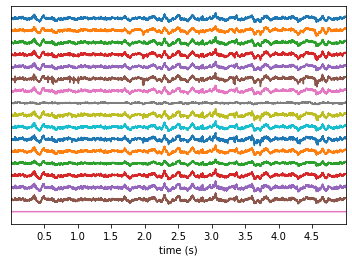

In [3]:
w_ts = sw.plot_timeseries(data, time_range=(0, 5))

In [4]:
ss.installed_sorters()

['klusta', 'tridesclous']

In [5]:
probe = ProbeGroup()
for i in range(4):
    tetrode = generate_tetrode()
    tetrode.move([i * 50, 0])
    probe.add_probe(tetrode)
probe.set_global_device_channel_indices(np.arange(16))

In [6]:
data = data.set_probes(probe)

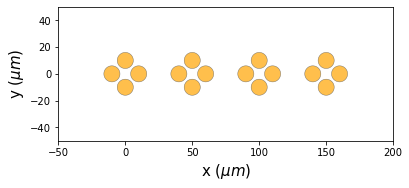

In [7]:
plot_probe_group(probe, same_axes=True)

In [8]:
# Klusta spike sorting
sorting_KL = ss.run_klusta(data, output_folder='/Users/daron/code/output')
print('Units found with Klusta:', sorting_KL.get_unit_ids())

RUNNING SHELL SCRIPT: /Users/daron/code/output/run_klusta.sh
Traceback (most recent call last):
  File "/Users/daron/code/spikeinterface/spikeinterface/sorters/basesorter.py", line 200, in run_from_folder
    SorterClass._run_from_folder(output_folder, sorter_params, verbose)
  File "/Users/daron/code/spikeinterface/spikeinterface/sorters/klusta/klusta.py", line 157, in _run_from_folder
    raise Exception('klusta returned a non-zero exit code')
Exception: klusta returned a non-zero exit code



SpikeSortingError: Spike sorting failed. You can inspect the runtime trace in /Users/daron/code/output/spikeinterface_log.json

In [14]:
ss.KlustaSorter.default_params()

{'adjacency_radius': None,
 'threshold_strong_std_factor': 5,
 'threshold_weak_std_factor': 2,
 'detect_sign': -1,
 'extract_s_before': 16,
 'extract_s_after': 32,
 'n_features_per_channel': 3,
 'pca_n_waveforms_max': 10000,
 'num_starting_clusters': 50,
 'total_memory': '500M',
 'n_jobs_bin': 1}